In [1]:
import WavPool.training.plot_results as plots
from WavPool.training.training_metrics import TrainingMetrics

import matplotlib.pyplot as plt
import json 
import pandas as pd 
import numpy as np
import os

In [2]:
results_path = "../results/naive_params/"
extra_metrics = [TrainingMetrics.accuracy,
                TrainingMetrics.auc_roc]

In [3]:
def _find_experiment(network, dataset): 
    all_experiments = os.listdir(results_path)
    exp_dir = [exp for exp in all_experiments if (network in exp) and (dataset in exp)][0]
    return exp_dir

def read_history_json(network, dataset): 
    experiment = _find_experiment(network, dataset)
    history_path = f"{results_path}{experiment}/history.json"
    with open(history_path, 'r') as path: 
        history = json.load(path)
    runs = []
    for key in history.keys(): 
        hist = pd.DataFrame(history[key]).astype(float)
        runs.append(hist)
    return runs


def read_param_json(network, dataset):
    experiment = _find_experiment(network, dataset)
    history_path = f"{results_path}{experiment}/parameter_history.json"
    with open(history_path, 'r') as path: 
        history = json.load(path)
    num_params = history['num_parameters']
    inference_time = history['inference_timing']
    training_time = history['training_timing']

    return num_params, inference_time, training_time

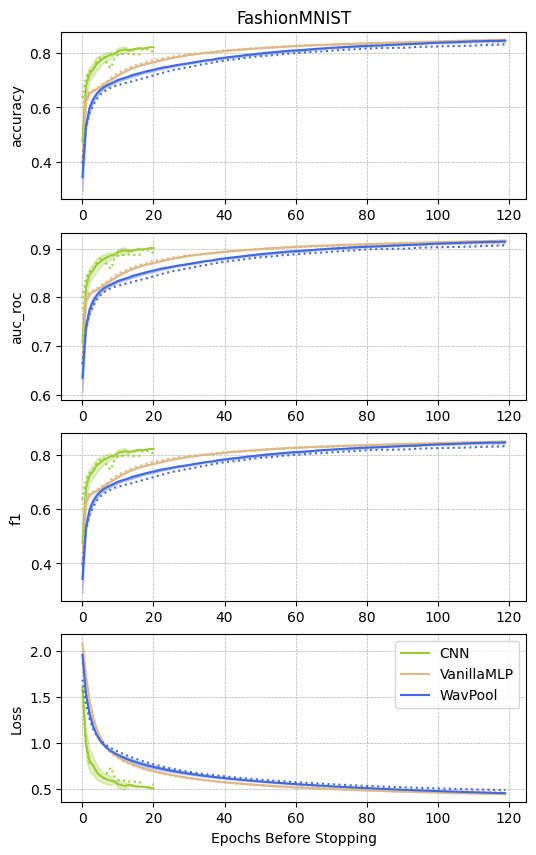

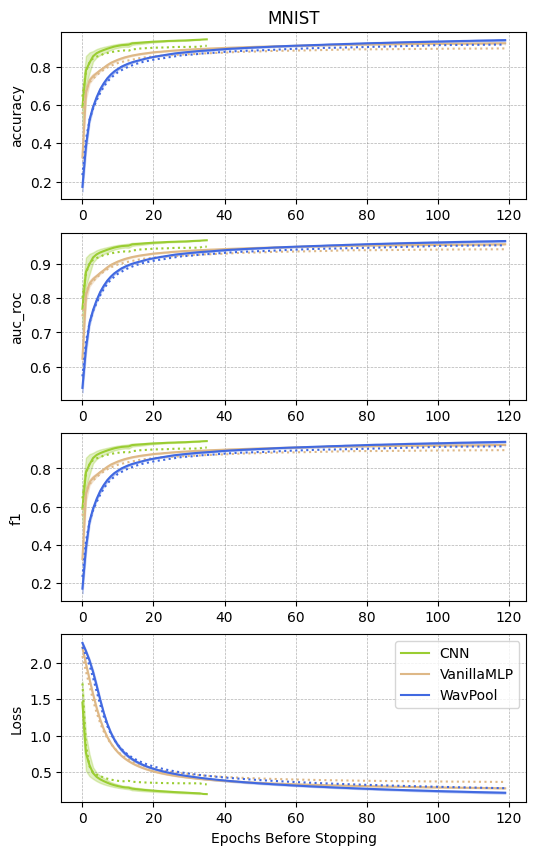

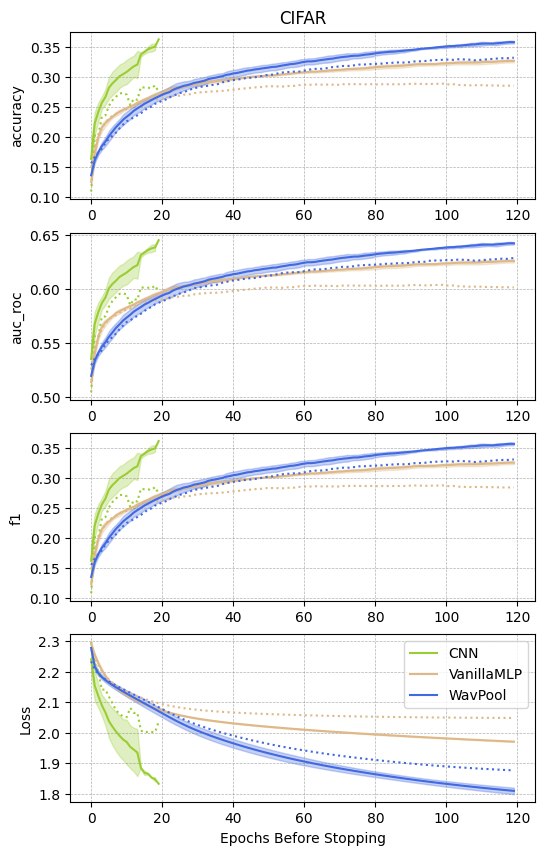

In [29]:
models = ["CNN", "VanillaMLP", "WavPool"]
colorway = ["yellowgreen", 'burlywood', "royalblue"]
markers = ["o", 's', '^']
datasets = ["FashionMNIST", "_MNIST", "CIFAR"]


for dataset in datasets: 
    n_subplots = len(extra_metrics) + 1
    fig, subplots = plt.subplots(nrows=n_subplots, ncols=1, figsize=(6, 2.5*n_subplots))

    for model, color, marker in zip(models, colorway, markers): 
        histories = read_history_json(model, dataset)
        label = model

        for metric_index, metrics in enumerate(extra_metrics):

            training = [history[f"train_{metrics.__name__}"] for history in histories]
            val = [history[f"val_{metrics.__name__}"] for history in histories]

            mean_training = pd.DataFrame(training).mean(axis=0)
            std_training = pd.DataFrame(training).std(axis=0)

            epochs = range(len(mean_training))

            mean_val = pd.DataFrame(val).mean(axis=0)

            subplots[metric_index].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

            subplots[metric_index].plot(epochs, mean_training, label=label, color=color)
            subplots[metric_index].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
            subplots[metric_index].plot(epochs, mean_val, linestyle='dotted', color=color)
            subplots[metric_index].set_ylabel(metrics.__name__)


        training = [history[f"train_loss"] for history in histories]
        val = [history[f"val_loss"] for history in histories]

        mean_training = pd.DataFrame(training).mean(axis=0)
        std_training = pd.DataFrame(training).std(axis=0)
        mean_val = pd.DataFrame(val).mean(axis=0)

        epochs = range(len(mean_training))

        metric_index = -1

        subplots[metric_index].plot(epochs, mean_training, label=label, color=color)
        subplots[metric_index].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
        subplots[metric_index].plot(epochs, mean_val, linestyle="dotted", color=color)
        subplots[metric_index].set_ylabel("Loss")
        subplots[metric_index].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        subplots[0].set_title(dataset.strip("_"))
    plt.xlabel("Epochs Before Stopping")
    plt.legend()
    plt.show()



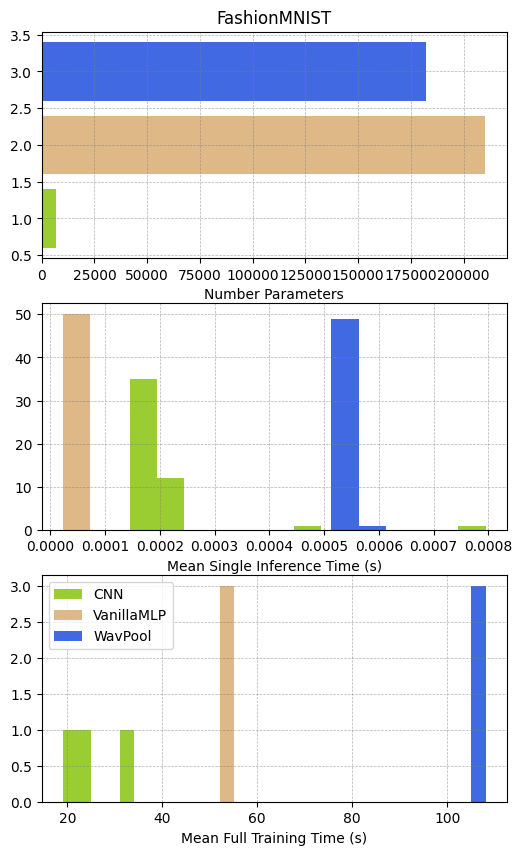

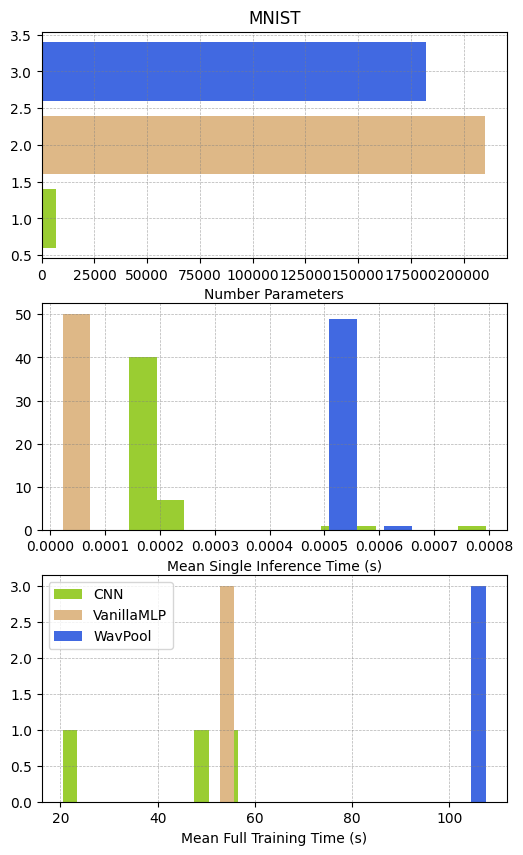

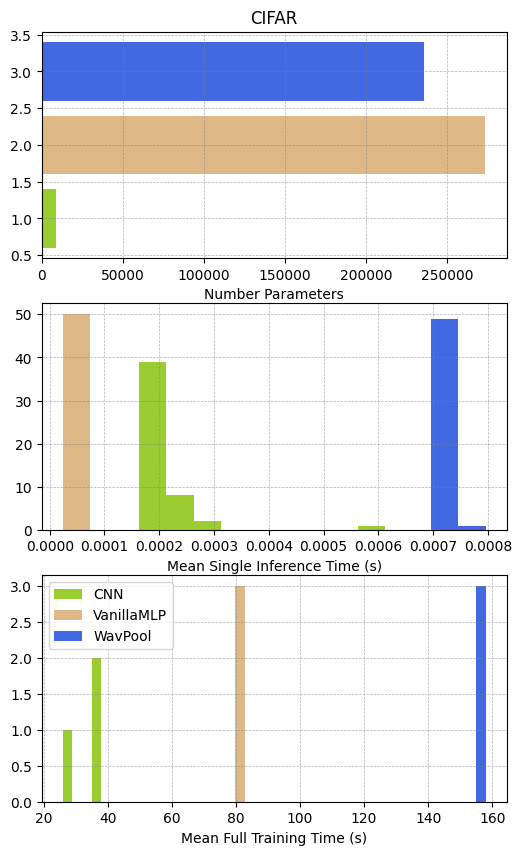

In [55]:
for dataset in datasets: 
    num_params = []
    inference_time = []
    training_time = []
    for i, model in enumerate(models): 
        params, inference, train = read_param_json(model, dataset)

        num_params.append(params)
        inference_time.append(inference)
        training_time.append(train)
    
    fig, subplots = plt.subplots(nrows=3, ncols=1, figsize=(6,10))

    bar_x = [i+1 for i in range(len(num_params))]
    widths = [.75 for _ in range(len(num_params))]

    subplots[0].barh(y=bar_x, width=num_params, color=colorway)
    subplots[0].set_xlabel("Number Parameters")
    subplots[0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    for model, color, inference, training in zip(models, colorway, inference_time, training_time):
        w = .00005
        subplots[1].hist(
            inference, 
            bins=np.arange(min(inference), max(inference)+w, w), 
            label=model, color=color)
        subplots[1].set_xlabel("Mean Single Inference Time (s)")
        subplots[1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        w = 3.0
        subplots[2].hist(
            training, 
            bins=np.arange(min(training), max(training)+w, w), 
            label=model, color=color)

        subplots[2].set_xlabel("Mean Full Training Time (s)")
        subplots[2].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    subplots[0].set_title(dataset.strip('_'))
    plt.legend()
    plt.show()

In [4]:
results_path = "../results/optimize_params/"

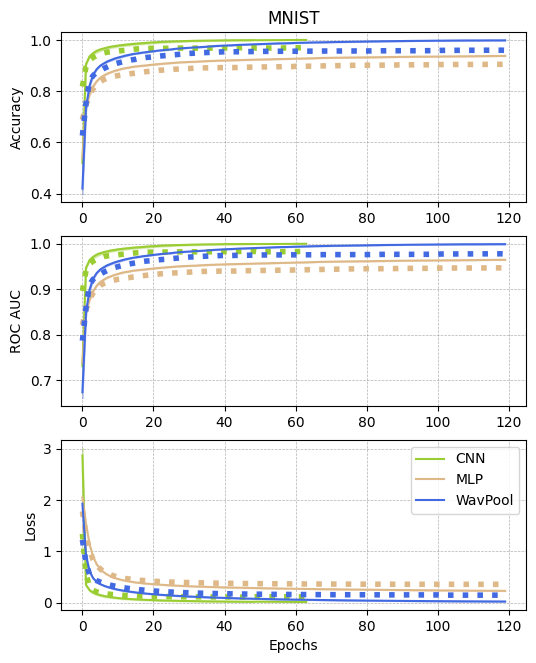

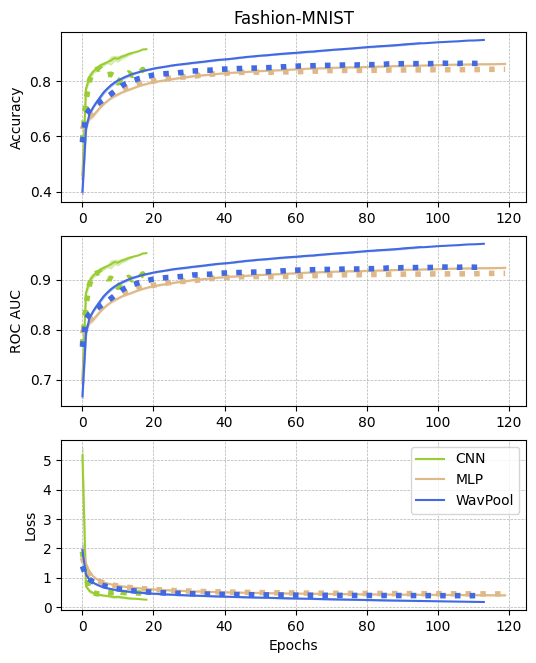

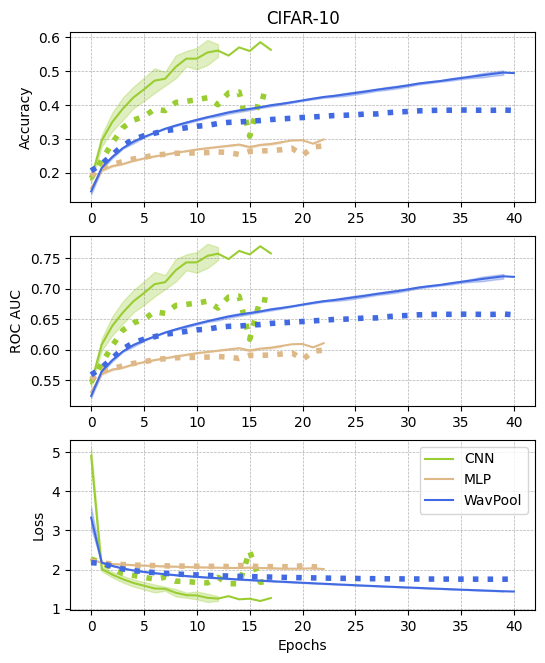

In [21]:
models, model_names = ["CNN", "VanillaMLP", "WavPool"], ["CNN", "MLP", "WavPool"]
colorway = ["yellowgreen", 'burlywood', "royalblue"]
markers = ["o", 's', '^']
datasets, dataset_name = ["_MNIST","FashionMNIST", "CIFAR"], ["MNIST", "Fashion-MNIST", "CIFAR-10"]


for dataset, dataset_name in zip(datasets, dataset_name): 
    n_subplots = len(extra_metrics) + 1
    fig, subplots = plt.subplots(nrows=n_subplots, ncols=1, figsize=(6, 2.5*n_subplots))

    for model, model_name, color, marker in zip(models, model_names, colorway, markers): 
        histories = read_history_json(model, dataset)
        label = model

        training = [history[f"train_{TrainingMetrics.accuracy.__name__}"] for history in histories]
        val = [history[f"val_{TrainingMetrics.accuracy.__name__}"] for history in histories]

        mean_training = pd.DataFrame(training).mean(axis=0)
        std_training = pd.DataFrame(training).std(axis=0)

        epochs = range(len(mean_training))

        mean_val = pd.DataFrame(val).mean(axis=0)

        subplots[0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        subplots[0].plot(epochs, mean_training, label=model_name, color=color)
        subplots[0].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
        subplots[0].plot(epochs, mean_val, linestyle='dotted', color=color, linewidth=4)
        subplots[0].set_ylabel("Accuracy")



        training = [history[f"train_{TrainingMetrics.auc_roc.__name__}"] for history in histories]
        val = [history[f"val_{TrainingMetrics.auc_roc.__name__}"] for history in histories]

        mean_training = pd.DataFrame(training).mean(axis=0)
        std_training = pd.DataFrame(training).std(axis=0)

        epochs = range(len(mean_training))

        mean_val = pd.DataFrame(val).mean(axis=0)

        subplots[1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        subplots[1].plot(epochs, mean_training, label=model_name, color=color)
        subplots[1].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
        subplots[1].plot(epochs, mean_val, linestyle='dotted', color=color,linewidth=4 )
        subplots[1].set_ylabel("ROC AUC")


        training = [history[f"train_loss"] for history in histories]
        val = [history[f"val_loss"] for history in histories]

        mean_training = pd.DataFrame(training).mean(axis=0)
        std_training = pd.DataFrame(training).std(axis=0)
        mean_val = pd.DataFrame(val).mean(axis=0)

        epochs = range(len(mean_training))

        metric_index = -1

        subplots[2].plot(epochs, mean_training, label=model_name, color=color)
        subplots[2].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
        subplots[2].plot(epochs, mean_val, linestyle="dotted", color=color, linewidth=4)
        subplots[2].set_ylabel("Loss")
        subplots[2].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        subplots[0].set_title(dataset_name)

    plt.xlabel("Epochs")
    plt.legend()
    plt.show()



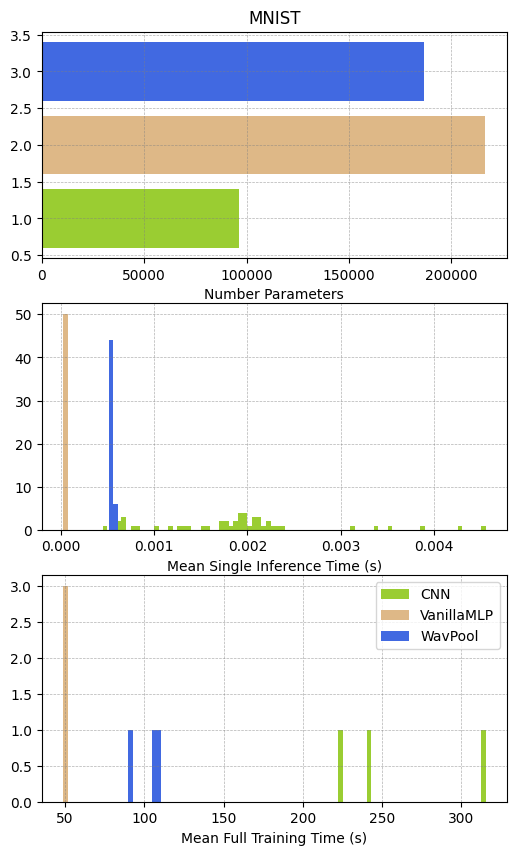

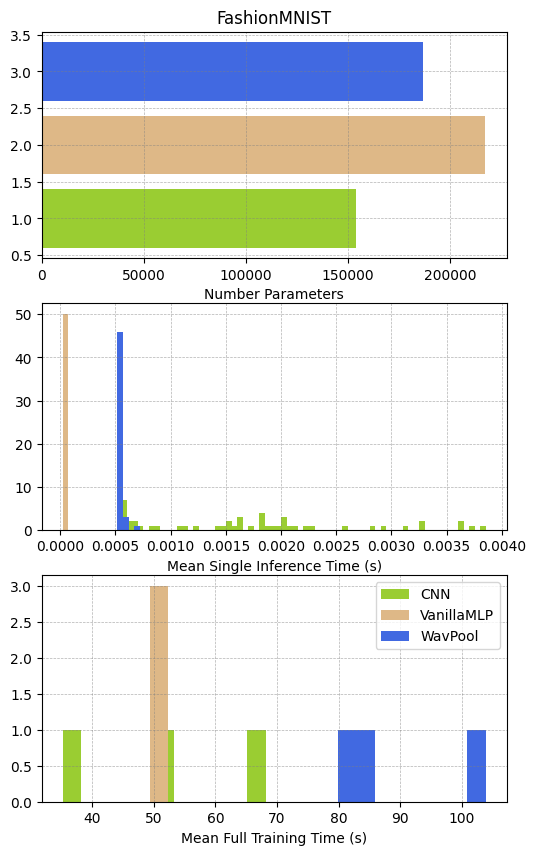

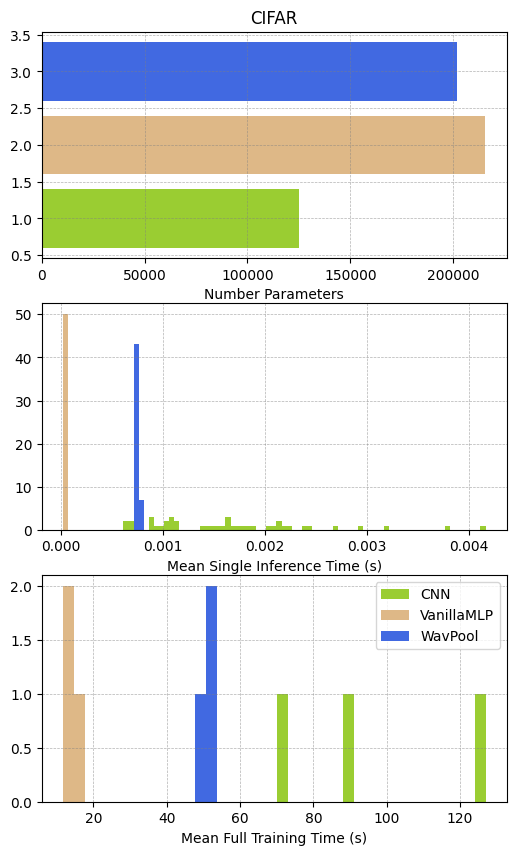

In [22]:
for dataset in datasets: 
    num_params = []
    inference_time = []
    training_time = []
    for i, model in enumerate(models): 
        params, inference, train = read_param_json(model, dataset)

        num_params.append(params)
        inference_time.append(inference)
        training_time.append(train)
    
    fig, subplots = plt.subplots(nrows=3, ncols=1, figsize=(6,10))

    bar_x = [i+1 for i in range(len(num_params))]
    widths = [.75 for _ in range(len(num_params))]

    subplots[0].barh(y=bar_x, width=num_params, color=colorway)
    subplots[0].set_xlabel("Number Parameters")
    subplots[0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    for model, color, inference, training in zip(models, colorway, inference_time, training_time):
        w = .00005
        subplots[1].hist(
            inference, 
            bins=np.arange(min(inference), max(inference)+w, w), 
            label=model, color=color)
        subplots[1].set_xlabel("Mean Single Inference Time (s)")
        subplots[1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        w = 3.0
        subplots[2].hist(
            training, 
            bins=np.arange(min(training), max(training)+w, w), 
            label=model, color=color)

        subplots[2].set_xlabel("Mean Full Training Time (s)")
        subplots[2].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    subplots[0].set_title(dataset.strip('_'))
    plt.legend()
    plt.show()

In [6]:
## Def make fractional difference 

frac_difference = pd.DataFrame()

for dataset, dataset_name in zip(["_MNIST","FashionMNIST", "CIFAR"], ["MNIST", "FMNIST", "CIFAR-10"]): 

    for model, model_name, color, marker in zip(models, model_names, colorway, markers): 
        histories = read_history_json(model, dataset)
        
        training = [history[f"train_{TrainingMetrics.accuracy.__name__}"] for history in histories]
        val = [history[f"val_{TrainingMetrics.accuracy.__name__}"] for history in histories]
        mean_acc_training = pd.DataFrame(training).mean(axis=0).max()
        mean_acc_val = pd.DataFrame(val).mean(axis=0).max()


        training = [history[f"train_{TrainingMetrics.auc_roc.__name__}"] for history in histories]
        val = [history[f"val_{TrainingMetrics.auc_roc.__name__}"] for history in histories]
        mean_auc_train = pd.DataFrame(training).mean(axis=0).max()
        mean_auc_val = pd.DataFrame(val).mean(axis=0).max()


        training = [history[f"train_loss"] for history in histories]
        val = [history[f"val_loss"] for history in histories]
        mean_training = pd.DataFrame(training).mean(axis=0).min()
        mean_val = pd.DataFrame(val).mean(axis=0).min()

        frac_difference = frac_difference.append(pd.DataFrame({
            "dataset":dataset_name, "model":model_name, 
"mean_val_loss":mean_val, 
"auc_val":mean_auc_val, 
"acc_val":mean_acc_val}, index=[0])) #type: ignore
        
frac_difference

/var/folders/95/_pswfcf9723cb9f4vw6h944m0000gr/T/ipykernel_34074/201672723.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frac_difference = frac_difference.append(pd.DataFrame({
/var/folders/95/_pswfcf9723cb9f4vw6h944m0000gr/T/ipykernel_34074/201672723.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frac_difference = frac_difference.append(pd.DataFrame({
/var/folders/95/_pswfcf9723cb9f4vw6h944m0000gr/T/ipykernel_34074/201672723.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frac_difference = frac_difference.append(pd.DataFrame({
/var/folders/95/_pswfcf9723cb9f4vw6h944m0000gr/T/ipykernel_34074/201672723.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

,dataset,model,mean_val_loss,auc_val,acc_val
0,MNIST,CNN,0.104825,0.983479,0.970312
0,MNIST,MLP,0.354901,0.946988,0.904799
0,MNIST,WavPool,0.143238,0.977776,0.959821
0,FMNIST,CNN,0.441575,0.914754,0.845685
0,FMNIST,MLP,0.447094,0.912562,0.843006
0,FMNIST,WavPool,0.387656,0.925286,0.865179
0,CIFAR-10,CNN,1.638879,0.687470,0.438839
0,CIFAR-10,MLP,2.069043,0.599202,0.279464
0,CIFAR-10,WavPool,1.753466,0.658395,0.385826


In [9]:

import sys
sys.path.append("../../LatexAutoTable/")
from AutoTable.table import Table
from AutoTable.elements import Elements

In [8]:
table = Table(table_columns=[])

for dataset in frac_difference['dataset'].unique(): 
    subset = frac_difference[frac_difference['dataset']==dataset]
    wavpool = subset[subset['model']=='WavPool'][[col for col in subset.columns if col not in ['dataset', 'model']]]
    
    subset = subset[[col for col in subset.columns if col not in ['dataset', 'model']]]
    
    difference = (wavpool-subset)/subset
    table.add_multicol_element(super_columns=[dataset], columns=difference.columns, title=dataset, rows_name=model_names, data_to_fill=np.round(difference.values, decimals=3))

table.make()
    

\begin{table} \\ 
\begin{tabular}{} \\ 
 \\ 
mean_val_loss & auc_val & acc_val \\ 
& CNN & 0.366 & -0.006 & -0.011 \\ 
& MLP & -0.596 & 0.033 & 0.061 \\ 
& WavPool & 0.0 & 0.0 & 0.0 \\ 
mean_val_loss & auc_val & acc_val \\ 
& CNN & -0.122 & 0.012 & 0.023 \\ 
& MLP & -0.133 & 0.014 & 0.026 \\ 
& WavPool & 0.0 & 0.0 & 0.0 \\ 
mean_val_loss & auc_val & acc_val \\ 
& CNN & 0.07 & -0.042 & -0.121 \\ 
& MLP & -0.153 & 0.099 & 0.381 \\ 
& WavPool & 0.0 & 0.0 & 0.0 \\ 
\label{} \\ 
\end{tabular} \\ 
\end{table}


'\\begin{table} \\\\ \n\\begin{tabular}{} \\\\ \n \\\\ \nmean_val_loss & auc_val & acc_val \\\\ \n& CNN & 0.366 & -0.006 & -0.011 \\\\ \n& MLP & -0.596 & 0.033 & 0.061 \\\\ \n& WavPool & 0.0 & 0.0 & 0.0 \\\\ \nmean_val_loss & auc_val & acc_val \\\\ \n& CNN & -0.122 & 0.012 & 0.023 \\\\ \n& MLP & -0.133 & 0.014 & 0.026 \\\\ \n& WavPool & 0.0 & 0.0 & 0.0 \\\\ \nmean_val_loss & auc_val & acc_val \\\\ \n& CNN & 0.07 & -0.042 & -0.121 \\\\ \n& MLP & -0.153 & 0.099 & 0.381 \\\\ \n& WavPool & 0.0 & 0.0 & 0.0 \\\\ \n\\label{} \\\\ \n\\end{tabular} \\\\ \n\\end{table}'

In [20]:
## Def make fractional difference 

table = Table([])

frac_difference = pd.DataFrame()
model = "CNN"
results = []
for dataset, dataset_name in zip(["_MNIST","FashionMNIST", "CIFAR"], ["MNIST", "FMNIST", "CIFAR-10"]): 

    histories = read_history_json(model, dataset)
    
    val_acc = pd.DataFrame([history[f"val_{TrainingMetrics.accuracy.__name__}"] for history in histories]).mean(axis=1)
    val = np.round(val_acc.mean(), 3)
    errorbar = np.round(val_acc.std(), 3)

    acc = f"{val}$\pm${errorbar}"
    print(acc)
    val_roc = pd.DataFrame([history[f"val_{TrainingMetrics.auc_roc.__name__}"] for history in histories]).mean(axis=1)
    val = np.round(val_roc.mean(axis=0), 3)
    errorbar = np.round(val_roc.std(axis=0), 3)

    roc = f"{val}$\pm${errorbar}"
    
    n_params = "ph"

    results.append([dataset_name, n_params, roc, acc])

table.table_elements = Elements.singlerow_subtable(results)
table.make()

0.959$\pm$0.003
0.797$\pm$0.02
0.352$\pm$0.019
\begin{table} \\ 
\begin{tabular}{} \\ 
 \\ 
MNIST & ph & 0.977$\pm$0.002 & 0.959$\pm$0.003 \\ 
FMNIST & ph & 0.887$\pm$0.012 & 0.797$\pm$0.02 \\ 
CIFAR-10 & ph & 0.642$\pm$0.01 & 0.352$\pm$0.019 \\ 
\label{} \\ 
\end{tabular} \\ 
\end{table}


'\\begin{table} \\\\ \n\\begin{tabular}{} \\\\ \n \\\\ \nMNIST & ph & 0.977$\\pm$0.002 & 0.959$\\pm$0.003 \\\\ \nFMNIST & ph & 0.887$\\pm$0.012 & 0.797$\\pm$0.02 \\\\ \nCIFAR-10 & ph & 0.642$\\pm$0.01 & 0.352$\\pm$0.019 \\\\ \n\\label{} \\\\ \n\\end{tabular} \\\\ \n\\end{table}'